<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/AA_PRACTICA2_GRUPO_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


In [6]:
# CARGAMOS EL CONJUNTO DE DATOS MNIST EN KERAS
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [7]:
# Vemos la matriz de la imagen número 10 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[9]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0 164  50   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   1   0   0   1   1   0   0   5   0  45 217 255 176   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   3   3   5   9   0   2   0  62 236 231 215  27   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29 244 231 234  74   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0  23  41  59 111 134 138 226 202 217  22   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0  35 179 195 182 225 198 241 177 199 205 210  26   0   1   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0  19   0   0   0   0   0 235 24

In [8]:
# La imagen anterior corresponde con la sandalia (tacón) asociada al número 5. Hasta se puede intuir.... 
train_labels[9]

5

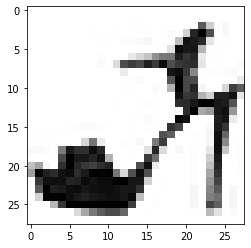

In [9]:
# Veamos el elemento 10 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[9]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [10]:
# Normalizamos las imágenes

# Imagenes de entrenamiento.
train_images = train_images.astype('float32') / 255

# Imagenes de test.
test_images = test_images.astype('float32') / 255

## Casos


En esta sección se definen y entrenan los tres casos a estudiar en la práctica.

Nuestro problema de clasificación de prendas será secuencial y tendrá una salida con 10 clases correspondientes a los diez tipos de prendas, independientemente del resto de parámetros utilizados, los cuales iremos variando.

También, estarán formados por capas de neuronas convolucionales, donde los píxeles de entrada se irán recorriendo en función del tamaño de las ventanas aplicado en cada capa.

La capa de salida estará formada por 10 neuronas y por la función de activación 'softmax' para que nos devuelva un vector de distribución de probabilidad sobre las clases que buscamos clasificar.

In [11]:
# Librerías a utilizar para construir los modelos
from keras import models
from keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [12]:
# Definimos variables que van a contener los resultados de los entrenamientos
HISTORY = []
TEST_LOSS = []
TEST_ACC = []

### Caso 1

In [13]:
model_1 = Sequential()
model_1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(10, activation='softmax'))

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [14]:
model_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history_m1 = model_1.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=5)

HISTORY.append(history_m1)

Epoch 1/5
600/600 [==============================] - 10s 4ms/step - loss: 1.2459 - accuracy: 0.5953
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.6819 - accuracy: 0.7508
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5946 - accuracy: 0.7846
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5425 - accuracy: 0.8044
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5072 - accuracy: 0.8198


In [15]:
test_loss_m1, test_acc_m1 = model_1.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m1)
TEST_ACC.append(test_acc_m1)

print('Test accuracy:', test_acc_m1)
print('Test loss:', test_loss_m1)

313/313 [==============================] - 1s 3ms/step - loss: 0.5220 - accuracy: 0.8109
Test accuracy: 0.8108999729156494
Test loss: 0.5220004916191101


### Caso 2

In [16]:
model_2 = Sequential()
model_2.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1)))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(Flatten())
model_2.add(Dense(65, activation='relu'))
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 65)               

In [17]:
model_2.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history_m2 = model_2.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=5)

HISTORY.append(history_m2)

Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 1.3524 - accuracy: 0.5501
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.7307 - accuracy: 0.7252
Epoch 3/5
600/600 [==============================] - 3s 4ms/step - loss: 0.6325 - accuracy: 0.7618
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.5747 - accuracy: 0.7857
Epoch 5/5
600/600 [==============================] - 3s 4ms/step - loss: 0.5386 - accuracy: 0.8021


In [18]:
test_loss_m2, test_acc_m2 = model_2.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m2)
TEST_ACC.append(test_acc_m2)

print('Test accuracy:', test_acc_m2)
print('Test loss:', test_loss_m2)

313/313 [==============================] - 1s 3ms/step - loss: 0.5556 - accuracy: 0.8001
Test accuracy: 0.8001000285148621
Test loss: 0.5555535554885864


### Caso 3

In [19]:
model_3 = Sequential()
model_3.add(Conv2D(64, (7, 7), activation='relu', input_shape=(28, 28, 1)))
model_3.add(MaxPooling2D((2, 2)))

model_3.add(Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3.add(MaxPooling2D((2, 2)))

model_3.add(Flatten())
model_3.add(Dense(65, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 65)               

In [20]:
model_3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_m3 = model_3.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=5)

HISTORY.append(history_m3)

Epoch 1/5
600/600 [==============================] - 3s 5ms/step - loss: 0.5635 - accuracy: 0.7940
Epoch 2/5
600/600 [==============================] - 3s 5ms/step - loss: 0.3733 - accuracy: 0.8648
Epoch 3/5
600/600 [==============================] - 3s 5ms/step - loss: 0.3234 - accuracy: 0.8828
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.2911 - accuracy: 0.8932
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.2689 - accuracy: 0.9008


In [21]:
test_loss_m3, test_acc_m3 = model_3.evaluate(test_images, test_labels)
TEST_LOSS.append(test_loss_m3)
TEST_ACC.append(test_acc_m3)

print('Test accuracy:', test_acc_m3)
print('Test loss:', test_loss_m3)

313/313 [==============================] - 1s 3ms/step - loss: 0.3022 - accuracy: 0.8887
Test accuracy: 0.888700008392334
Test loss: 0.30220749974250793


### Variantes

#### Caso 1. Variante 1

In [27]:
#Partición del conjunto de datos de entrenamiento
split = 0.25

index = int(len(train_images) * split) # índice a partir del cual se realiza la partición

# Partición imágenes
train_val = train_images[:index]
train_train = train_images[index:]

# Partición etiquetas one-hot encoded
train_labels_val = train_labels[:index]
train_train_labels = train_labels[index:]

In [28]:
model_1_variante_1 = Sequential()
model_1_variante_1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_1_variante_1.add(MaxPooling2D((2, 2)))

model_1_variante_1.add(Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_1_variante_1.add(MaxPooling2D((2, 2)))

model_1_variante_1.add(Flatten())
model_1_variante_1.add(Dense(10, activation='softmax'))

model_1_variante_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 10)               

In [29]:
model_1_variante_1.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history_m1_v_1 = model_1_variante_1.fit(train_images, train_labels,
                      batch_size=100,
                      epochs=25,
                      validation_data = (train_val, train_labels_val))

HISTORY.append(history_m1_v_1)

Epoch 1/25
600/600 [==============================] - 3s 4ms/step - loss: 1.1651 - accuracy: 0.6001 - val_loss: 0.7230 - val_accuracy: 0.7404
Epoch 2/25
600/600 [==============================] - 2s 4ms/step - loss: 0.6668 - accuracy: 0.7559 - val_loss: 0.5928 - val_accuracy: 0.7866
Epoch 3/25
600/600 [==============================] - 2s 4ms/step - loss: 0.5816 - accuracy: 0.7882 - val_loss: 0.5351 - val_accuracy: 0.8083
Epoch 4/25
600/600 [==============================] - 2s 4ms/step - loss: 0.5311 - accuracy: 0.8073 - val_loss: 0.5390 - val_accuracy: 0.8039
Epoch 5/25
600/600 [==============================] - 2s 4ms/step - loss: 0.4965 - accuracy: 0.8231 - val_loss: 0.4703 - val_accuracy: 0.8319
Epoch 6/25
600/600 [==============================] - 2s 4ms/step - loss: 0.4713 - accuracy: 0.8327 - val_loss: 0.4613 - val_accuracy: 0.8277
Epoch 7/25
600/600 [==============================] - 2s 4ms/step - loss: 0.4515 - accuracy: 0.8406 - val_loss: 0.4314 - val_accuracy: 0.8471
Epoch 